In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("tips.csv")

In [4]:
df.shape

(244, 7)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
duplicate_counts = df.value_counts()
print(duplicate_counts[duplicate_counts > 1])
df=df.drop_duplicates()
print(df.shape)

total_bill  tip  sex     smoker  day   time   size
13.0        2.0  Female  Yes     Thur  Lunch  2       2
Name: count, dtype: int64
(243, 7)


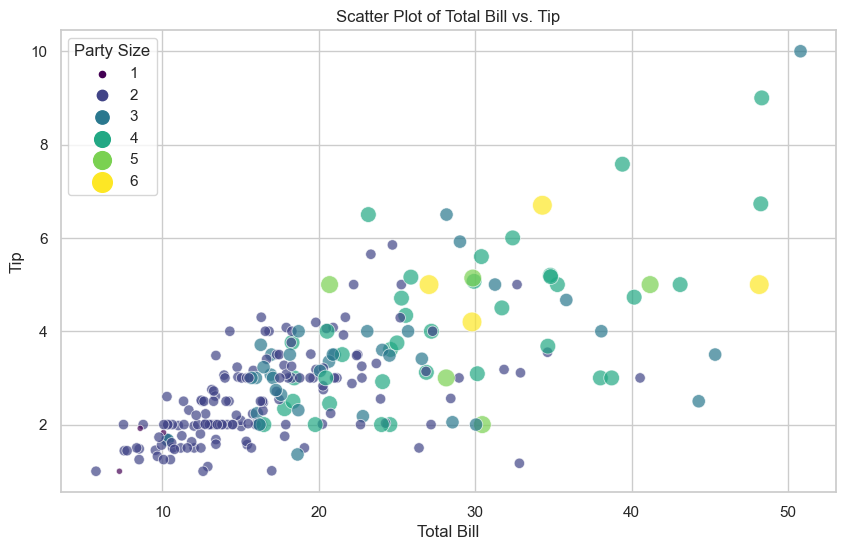

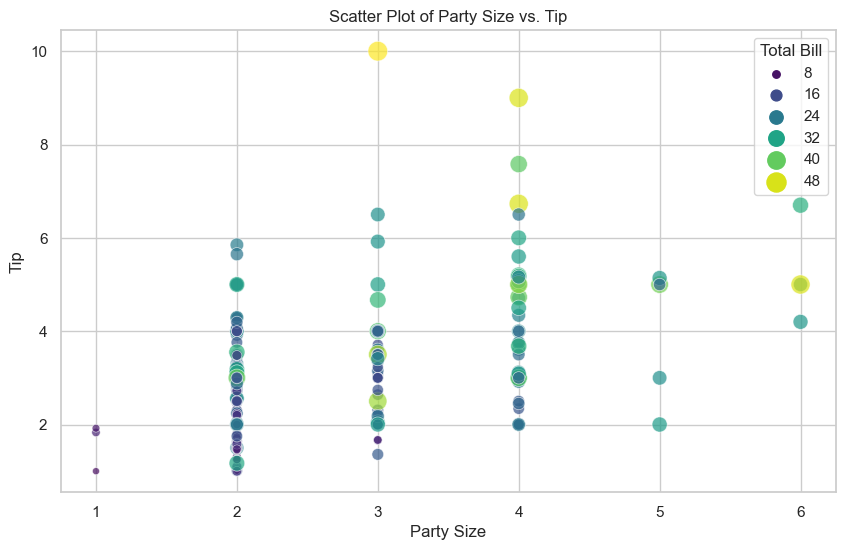

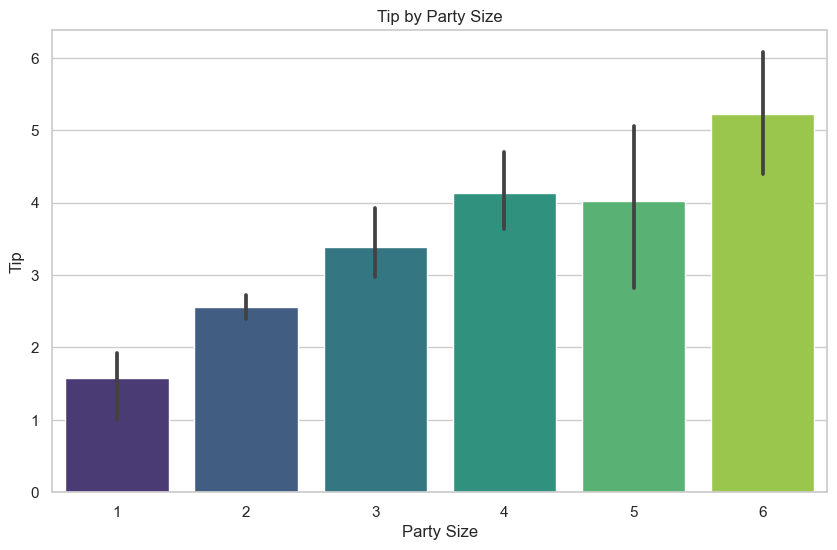

In [ ]:


sns.set(style="whitegrid")

# Scatter Plot: total_bill vs. tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='size', palette='viridis', size='size', sizes=(20, 200), alpha=0.7)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Party Size')
plt.show()

# Scatter Plot: size vs. tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size', y='tip', hue='total_bill', palette='viridis', size='total_bill', sizes=(20, 200), alpha=0.7)
plt.title('Scatter Plot of Party Size vs. Tip')
plt.xlabel('Party Size')
plt.ylabel('Tip')
plt.legend(title='Total Bill')
plt.show()
# Bar Plot: Tip by Party Size
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='tip', data=df, palette='viridis', estimator=np.mean)
plt.title('Tip by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Tip')
plt.show()




C:\Users\91783\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


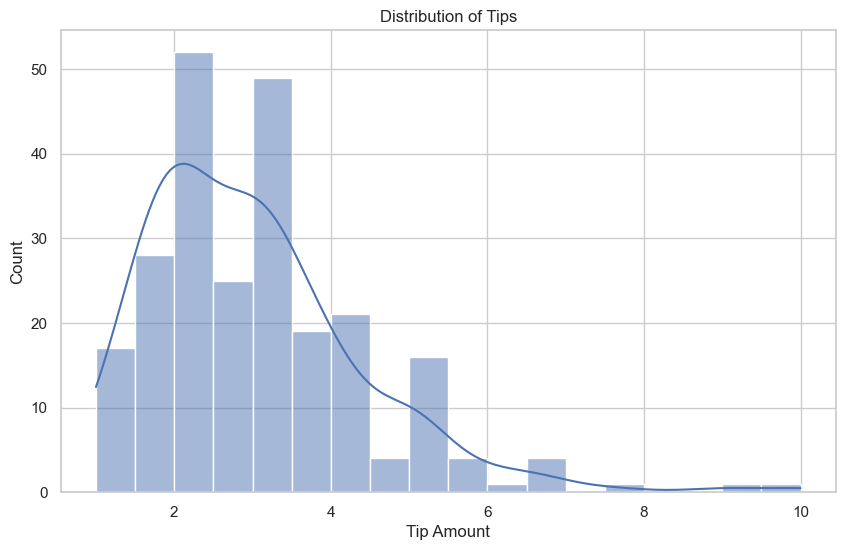

C:\Users\91783\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


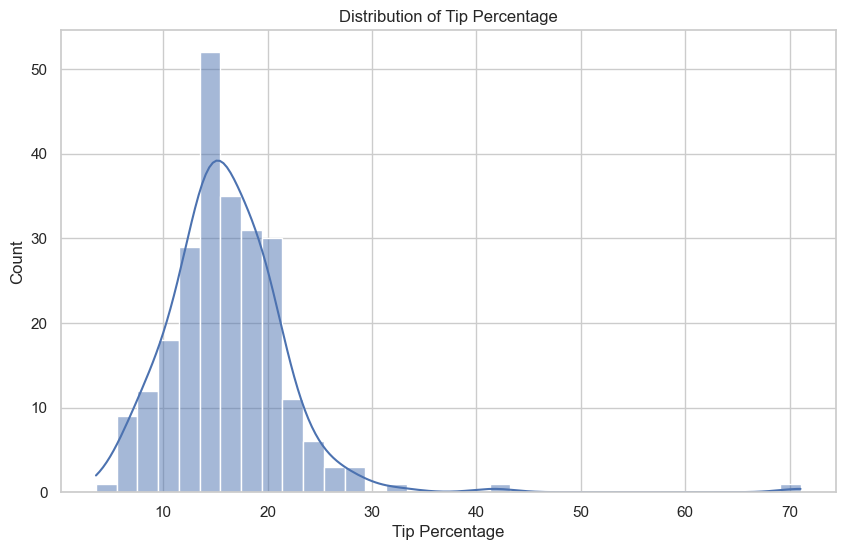

In [ ]:


sns.set(style="whitegrid")

# Distribution of Tip Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.show()

df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Distribution of Tip Percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_percentage'], kde=True)
plt.title('Distribution of Tip Percentage')
plt.xlabel('Tip Percentage')
plt.show()


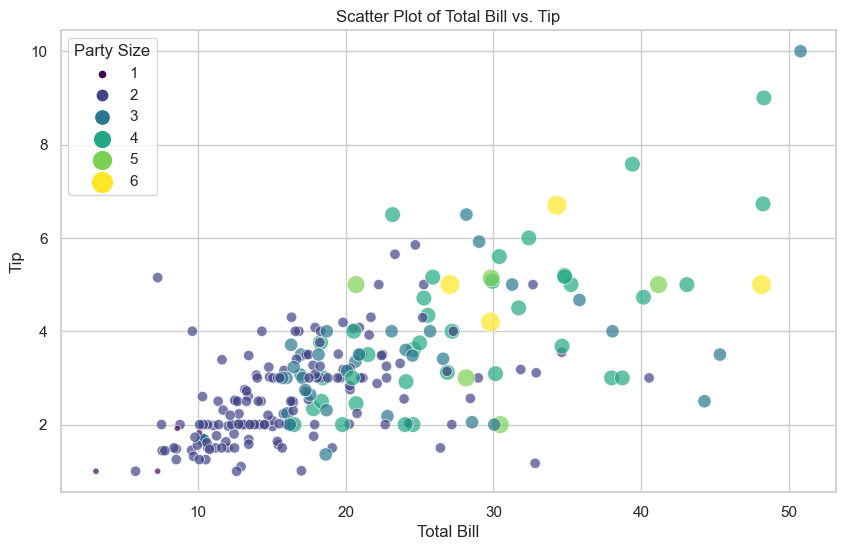

In [13]:
# Scatter Plot: Total Bill vs. Tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='size', palette='viridis', size='size', sizes=(20, 200), alpha=0.7)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Party Size')
plt.show()



In [ ]:

Q1 = df['tip_percentage'].quantile(0.25)
Q3 = df['tip_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Original dataset size: {df.shape[0]}")

df = df[(df['tip_percentage'] >= lower_bound) & (df['tip_percentage'] <= upper_bound)]



print(f"Dataset size after removing outliers: {df.shape[0]}")


Original dataset size: 243
Dataset size after removing outliers: 239


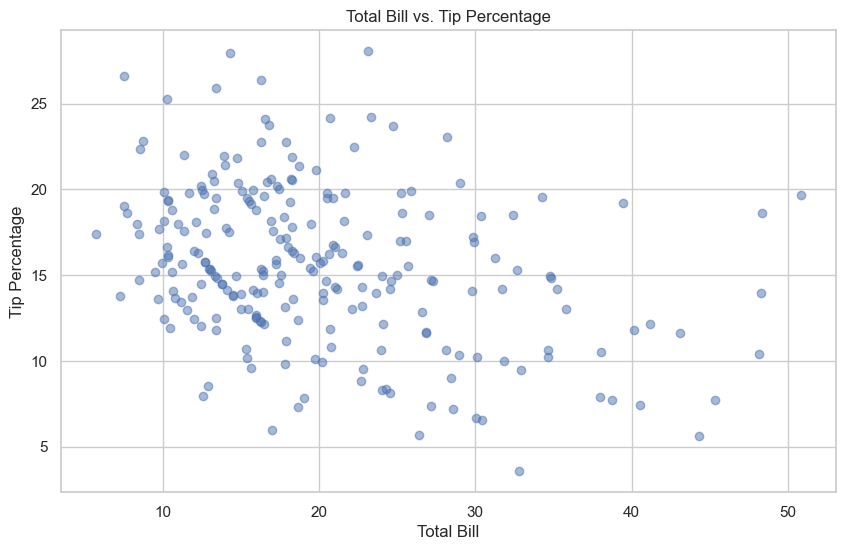

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip_percentage'], alpha=0.5)
plt.title('Total Bill vs. Tip Percentage')
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.show()


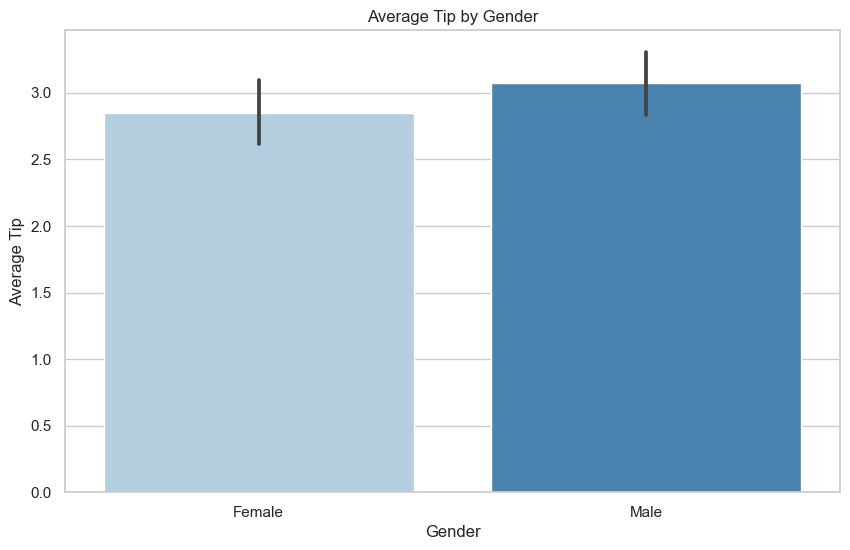

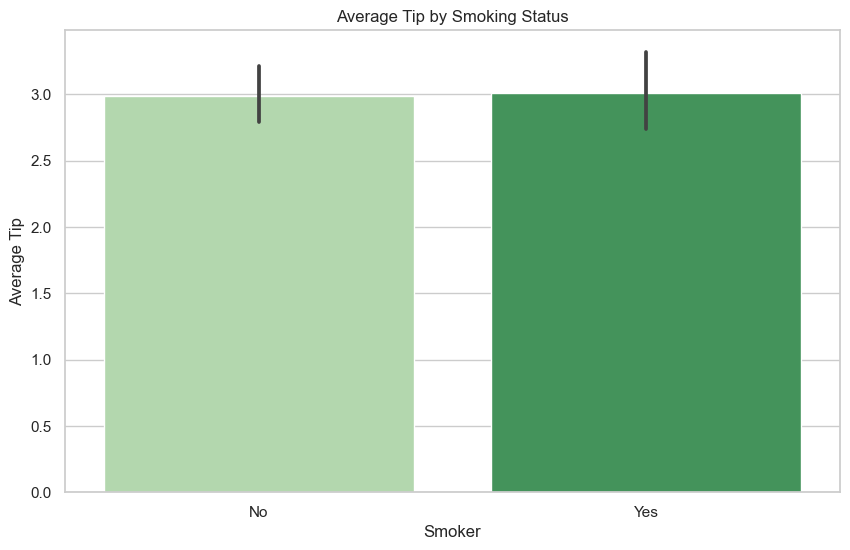

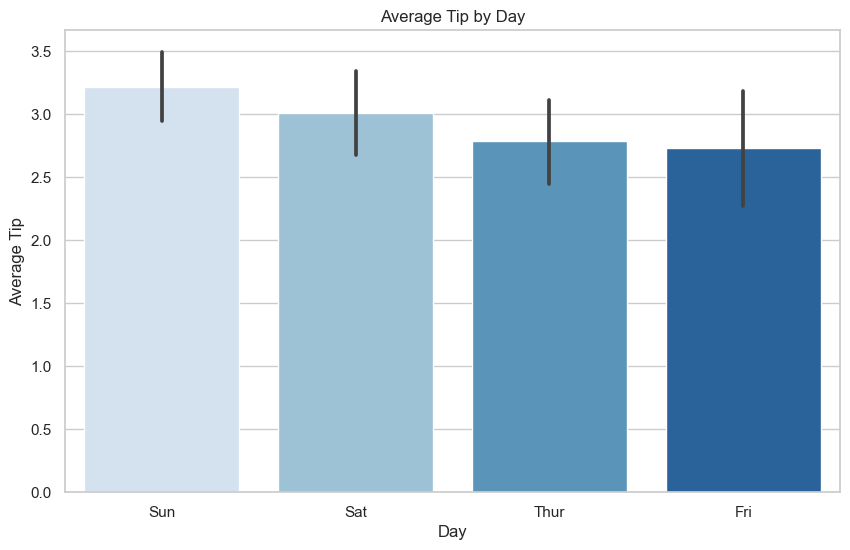

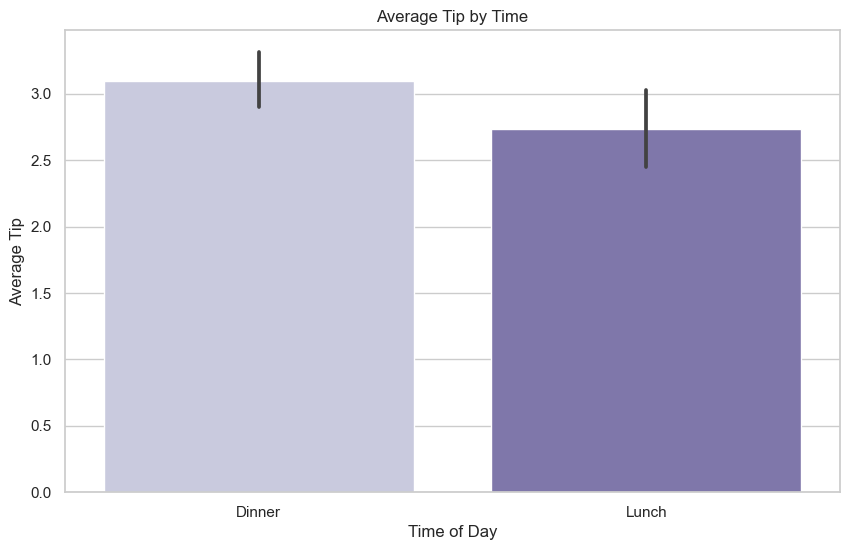

In [ ]:
# Average Tip by Gender - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='tip', data=df, estimator=np.mean, palette="Blues")
plt.title('Average Tip by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip')
plt.show()

# Average Tip by Smoking Status - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='tip', data=df, estimator=np.mean, palette="Greens")
plt.title('Average Tip by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Average Tip')
plt.show()

# Average Tip by Day - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='tip', data=df, estimator=np.mean, palette="Blues")
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

# Average Tip by Time - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='tip', data=df, estimator=np.mean, palette="Purples")
plt.title('Average Tip by Time')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip')
plt.show()



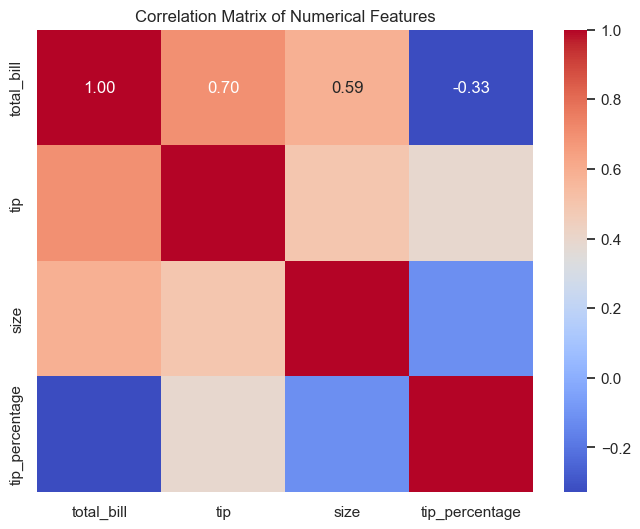

In [22]:
correlation_matrix = df[['total_bill', 'tip', 'size', 'tip_percentage']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


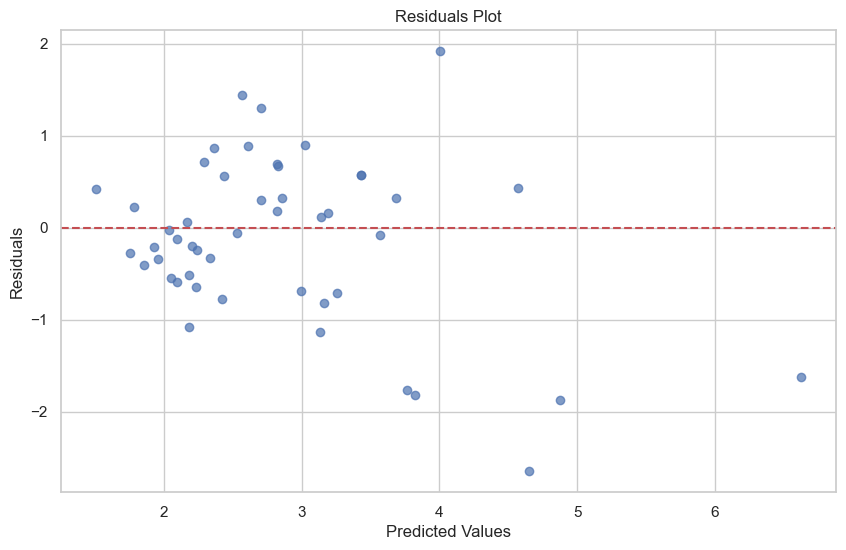

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[['total_bill', 'size']]  # Add other predictors as needed
y = df['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y)
X = pd.get_dummies(df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']], drop_first=True)
y = df['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



Linear Regression R^2: 0.2951032236131851
Linear Regression RMSE: 0.9012578663460341
Ridge Regression R^2: 0.2969059904780116
Ridge Regression RMSE: 0.9001046492873108
Lasso Regression R^2: 0.33634473234013007
Lasso Regression RMSE: 0.8744955000777618


In [28]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree R^2:", r2_score(y_test, y_pred_tree))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting R^2:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Decision Tree R^2: -0.1684068614221863
Decision Tree RMSE: 1.1603349013682789
Random Forest R^2: 0.1799320404966983
Random Forest RMSE: 0.9721006380085695
Gradient Boosting R^2: 0.22355397307720926
Gradient Boosting RMSE: 0.9458928488397733


In [29]:
# Standardize the data for SVR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Support Vector Regression
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
print("SVR R^2:", r2_score(y_test, y_pred_svr))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN R^2:", r2_score(y_test, y_pred_knn))
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))


SVR R^2: 0.46436480149039316
SVR RMSE: 0.785635067416505
KNN R^2: 0.13875599029025987
KNN RMSE: 0.9962065967124155


In [30]:
# Comparison of different models
print(f"Linear Regression: R^2={r2_score(y_test, y_pred):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"Ridge Regression: R^2={r2_score(y_test, y_pred_ridge):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.3f}")
print(f"Lasso Regression: R^2={r2_score(y_test, y_pred_lasso):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.3f}")
print(f"Decision Tree: R^2={r2_score(y_test, y_pred_tree):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_tree)):.3f}")
print(f"Random Forest: R^2={r2_score(y_test, y_pred_rf):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")
print(f"Gradient Boosting: R^2={r2_score(y_test, y_pred_gb):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_gb)):.3f}")
print(f"SVR: R^2={r2_score(y_test, y_pred_svr):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_svr)):.3f}")
print(f"KNN: R^2={r2_score(y_test, y_pred_knn):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_knn)):.3f}")

Linear Regression: R^2=0.295, RMSE=0.901
Ridge Regression: R^2=0.297, RMSE=0.900
Lasso Regression: R^2=0.336, RMSE=0.874
Decision Tree: R^2=-0.168, RMSE=1.160
Random Forest: R^2=0.180, RMSE=0.972
Gradient Boosting: R^2=0.224, RMSE=0.946
SVR: R^2=0.464, RMSE=0.786
KNN: R^2=0.139, RMSE=0.996


In [31]:
#Support Vector Regression (SVR) shows the best performance, with the highest R² (0.464) and the lowest RMSE (0.786). 
#This suggests that SVR is the most effective model for predicting tip amounts in this dataset.

#the decision tree seemed to underperform. So lets do some hyperparameter tuning


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt = DecisionTreeRegressor(random_state=42)


grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)


best_params_dt = grid_search_dt.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")

# Best model evaluation
y_pred_dt_tuned = grid_search_dt.predict(X_test)
print(f"Decision Tree (Tuned): R^2={r2_score(y_test, y_pred_dt_tuned):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned)):.3f}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters for Decision Tree: {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree (Tuned): R^2=0.242, RMSE=0.935


C:\Users\91783\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [45]:
# Suggested Tip Amounts & Service Optimization:

# Offer tip options based on the total bill: 15%, 18%, and 20%.
# Provide dedicated service for high-bill customers and large parties to encourage higher tips.
# Automatically suggest higher tips (18-20%) for larger bills or groups.
# Adjust staffing and shift schedules based on peak tipping times (e.g., dinner rush, weekends).